In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import yfinance as yf

In [ ]:
pip install yfinance

In [ ]:
ticker="GOOG"
start_date="2024-01-01"
end_date="2024-04-30"
import yfinance as yf
import pandas as pd
data=yf.download(ticker,start=start_date,end=end_date)
print(data)


[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  139.600006  140.615005  137.740005  139.559998  139.401367   
2024-01-03  138.600006  141.089996  138.429993  140.360001  140.200455   
2024-01-04  139.850006  140.634995  138.009995  138.039993  137.883087   
2024-01-05  138.352005  138.809998  136.850006  137.389999  137.233841   
2024-01-08  138.000000  140.639999  137.880005  140.529999  140.370270   
...                ...         ...         ...         ...         ...   
2024-04-23  158.589996  160.479996  157.964996  159.919998  159.738220   
2024-04-24  159.089996  161.389999  158.820007  161.100006  160.916885   
2024-04-25  153.360001  158.279999  152.768005  157.949997  157.770462   
2024-04-26  175.990005  176.419998  171.399994  173.690002  173.492569   
2024-04-29  170.770004  171.380005  167.059998  167.899994  167.709152   

              Volume  
Date          

In [ ]:
df=pd.DataFrame(data)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,139.600006,140.615005,137.740005,139.559998,139.401367,20071900
2024-01-03,138.600006,141.089996,138.429993,140.360001,140.200455,18974300
2024-01-04,139.850006,140.634995,138.009995,138.039993,137.883087,18253300
2024-01-05,138.352005,138.809998,136.850006,137.389999,137.233841,15433200
2024-01-08,138.000000,140.639999,137.880005,140.529999,140.370270,17645300


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2024-01-02 to 2024-04-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       82 non-null     float64
 1   High       82 non-null     float64
 2   Low        82 non-null     float64
 3   Close      82 non-null     float64
 4   Adj Close  82 non-null     float64
 5   Volume     82 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 4.5 KB


In [ ]:
df['date']=pd.to_datetime(df.index)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,date
Date,,,,,,,
2024-01-02,139.600006,140.615005,137.740005,139.559998,139.401367,20071900,2024-01-02
2024-01-03,138.600006,141.089996,138.429993,140.360001,140.200455,18974300,2024-01-03
2024-01-04,139.850006,140.634995,138.009995,138.039993,137.883087,18253300,2024-01-04
2024-01-05,138.352005,138.809998,136.850006,137.389999,137.233841,15433200,2024-01-05
2024-01-08,138.000000,140.639999,137.880005,140.529999,140.370270,17645300,2024-01-08


In [ ]:
import plotly.graph_objects as go
fig=go.Figure(data=[go.Candlestick(x=df['date'],open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])])
fig.update_layout(
    title='stock price chart google',
    yaxis_title='price ($)',
    xaxis_rangeslider_visible=False
)
fig.show()

In [ ]:
df.drop(['date','Volume'],axis=1,inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

<Axes: >

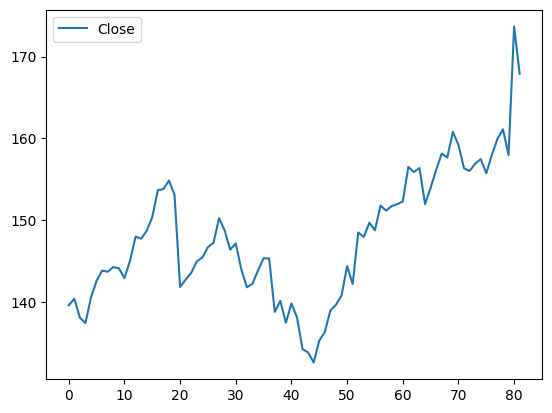

In [ ]:
df.plot.line(y="Close",use_index=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
#split the dataset into training and test set
X=df[['Open','High','Low','Close','Adj Close']]#input features
y=df['Close']#target variable
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
#Evaluating the model using mean squared error
mean_squared_error=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mean_squared_error)


Mean Squared Error: 0.37412855260512523


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close
77,158.589996,160.479996,157.964996,159.919998,159.738220
78,159.089996,161.389999,158.820007,161.100006,160.916885
79,153.360001,158.279999,152.768005,157.949997,157.770462
80,175.990005,176.419998,171.399994,173.690002,173.492569
81,170.770004,171.380005,167.059998,167.899994,167.709152


In [ ]:
new_data=np.array([[160.479996,161.389999,158.279999,176.419998,171.380005]])
predicted_price=rf.predict(new_data)
print("Predicted Price:",predicted_price[0])

Predicted Price: 163.74340118408202


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

